In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings(action='ignore')


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree


```
Data Set Characteristics: Multivariate
Number of Instances: 403
Area: Education
Attribute Characteristics: Real
Number of Attributes: 5
Associated Tasks: Classification
```



```
Class Distribution
Very Low: 50
Low:129
Middle: 122
high 130
Total:403
```



```
Attribute Information:
"STG (The degree of study time for goal object materails),"
SCG (The degree of repetition number of user for goal object materails)
STR (The degree of study time of user for related objects with goal object)
LPR (The exam performance of user for related objects with goal object)
PEG (The exam performance of user for goal objects)
UNS (The knowledge level of user)
```


In [2]:
data = pd.read_excel ('готовая табла .xlsx')
data.head ()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [3]:
data.columns

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', ' UNS'], dtype='object')

In [4]:
data = data.rename(columns={' UNS': 'UNS'})

In [5]:
train, test = train_test_split(data, test_size = 0.4, stratify = data['UNS'], random_state = 42)

In [6]:
X_train = train[['STG','SCG', 'STR', 'LPR','PEG']]
y_train = train.UNS
X_test = test[['STG','SCG', 'STR', 'LPR','PEG']]
y_test = test.UNS

fn = ['STG','SCG', 'STR', 'LPR','PEG']
cn = data['UNS'].unique()



In [7]:
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [8]:
y_pred=mod_dt.predict(X_test)

print('accuracy (точность) классификатора Деревья решений',metrics.accuracy_score(y_pred,y_test))

print("матрица ошибок")
print(metrics.confusion_matrix(y_test, y_pred))

accuracy (точность) классификатора Деревья решений 0.8271604938271605
матрица ошибок
[[40  0  1  0  0]
 [ 0 38 11  0  3]
 [ 0  3 46  0  0]
 [ 0  1  0  5  4]
 [ 0  2  0  3  5]]


In [9]:
new_blood=[0.07, 0.10, 0.14, 0.66, 0.31]
y_new_blood=mod_dt.predict([new_blood])

print(y_new_blood)

['Middle']


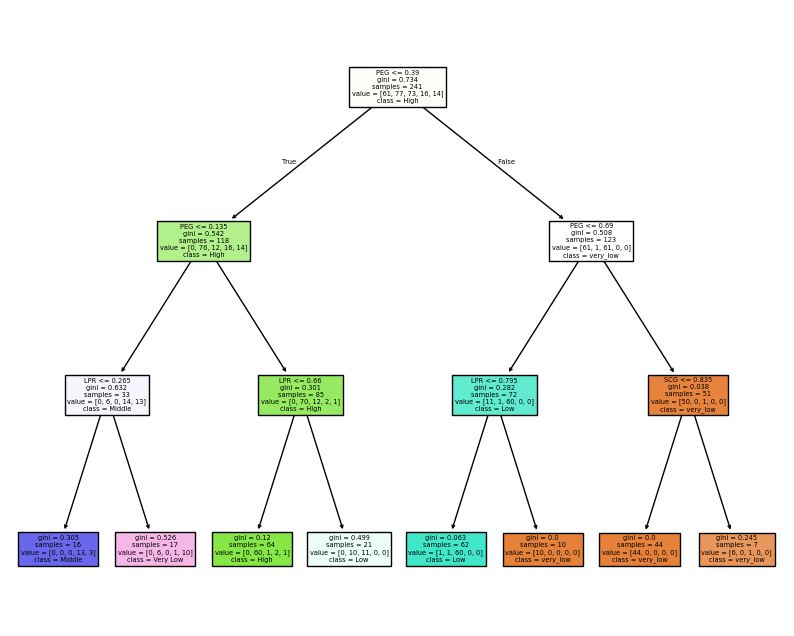

In [10]:
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True);